In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import pylab
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set()
import warnings

warnings.filterwarnings('ignore')

In [7]:
path = r'/Users/maxvilla/Desktop/grays_purps/Track_statistics.txt'
rd = pd.read_table(path)

In [10]:
rd.columns

Index([u' ', u'Label', u'NUMBER_SPOTS', u'NUMBER_GAPS', u'LONGEST_GAP',
       u'NUMBER_SPLITS', u'NUMBER_MERGES', u'NUMBER_COMPLEX',
       u'TRACK_DURATION', u'TRACK_START', u'TRACK_STOP', u'TRACK_DISPLACEMENT',
       u'TRACK_INDEX', u'TRACK_ID', u'TRACK_X_LOCATION', u'TRACK_Y_LOCATION',
       u'TRACK_Z_LOCATION', u'TRACK_MEAN_SPEED', u'TRACK_MAX_SPEED',
       u'TRACK_MIN_SPEED', u'TRACK_MEDIAN_SPEED', u'TRACK_STD_SPEED',
       u'TRACK_MEAN_QUALITY', u'TRACK_MAX_QUALITY', u'TRACK_MIN_QUALITY',
       u'TRACK_MEDIAN_QUALITY', u'TRACK_STD_QUALITY'],
      dtype='object')

In [12]:
rd

Label  NUMBER_SPOTS  NUMBER_GAPS  LONGEST_GAP  NUMBER_SPLITS  \
0      1    Track_0           150            0            0              0   
1      2    Track_1           150            0            0              0   
2      3    Track_2           150            0            0              0   
3      4    Track_3           150            0            0              0   
4      5    Track_4           150            0            0              0   
5      6    Track_5           150            0            0              0   
6      7    Track_6           150            0            0              0   
7      8    Track_7           150            0            0              0   
8      9    Track_8           150            0            0              0   
9     10    Track_9           150            0            0              0   
10    11   Track_10           150            0            0              0   
11    12   Track_11           150            0            0              0   
12    13   Track_12           138            1            1              0   
13    14   Track_13           150            0            0              0   
14    15   Track_14            42            1            1              0   
15    16   Track_15           150            0            0              0   
16    17   Track_16           150            0            0              0   
17    18   Track_17           112            1            1              0   
18    19   Track_18           150            0            0              0   
19    20   Track_19           150            0            0              0   
20    21   Track_20           139            0            0              0   
21    22   Track_21           150            0            0              0   
22    23   Track_22           150            0            0              0   
23    24   Track_23           150            0            0              0   
24    25   Track_24           150            0            0              0   
25    26   Track_25            40            2            1              0   
26    27   Track_26            79            1            1              0   
27    28   Track_27           150            0            0              0   
28    29   Track_28           150            0            0              0   
29    30   Track_29            16            0            0              0   
..   ...        ...           ...          ...          ...            ...   
276  277  Track_276            65            0            0              0   
277  278  Track_277            60            0            0              0   
278  279  Track_278            10            0            0              0   
279  280  Track_279            56            0            0              0   
280  281  Track_280            56            0            0              0   
281  282  Track_281            55            0            0              0   
282  283  Track_282            53            0            0              0   
283  284  Track_283            14            0            0              0   
284  285  Track_284            47            0            0              0   
285  286  Track_285            11            0            0              0   
286  287  Track_286            44            0            0              0   
287  288  Track_287            43            0            0              0   
288  289  Track_288            28            0            0              0   
289  290  Track_289            42            0            0              0   
290  291  Track_290            40            0            0              0   
291  292  Track_291             4            0            0              0   
292  293  Track_292            22            2            1              0   
293  294  Track_293             3            0            0              0   
294  295  Track_294             4            0            0              0   
295  296  Track_295            21   

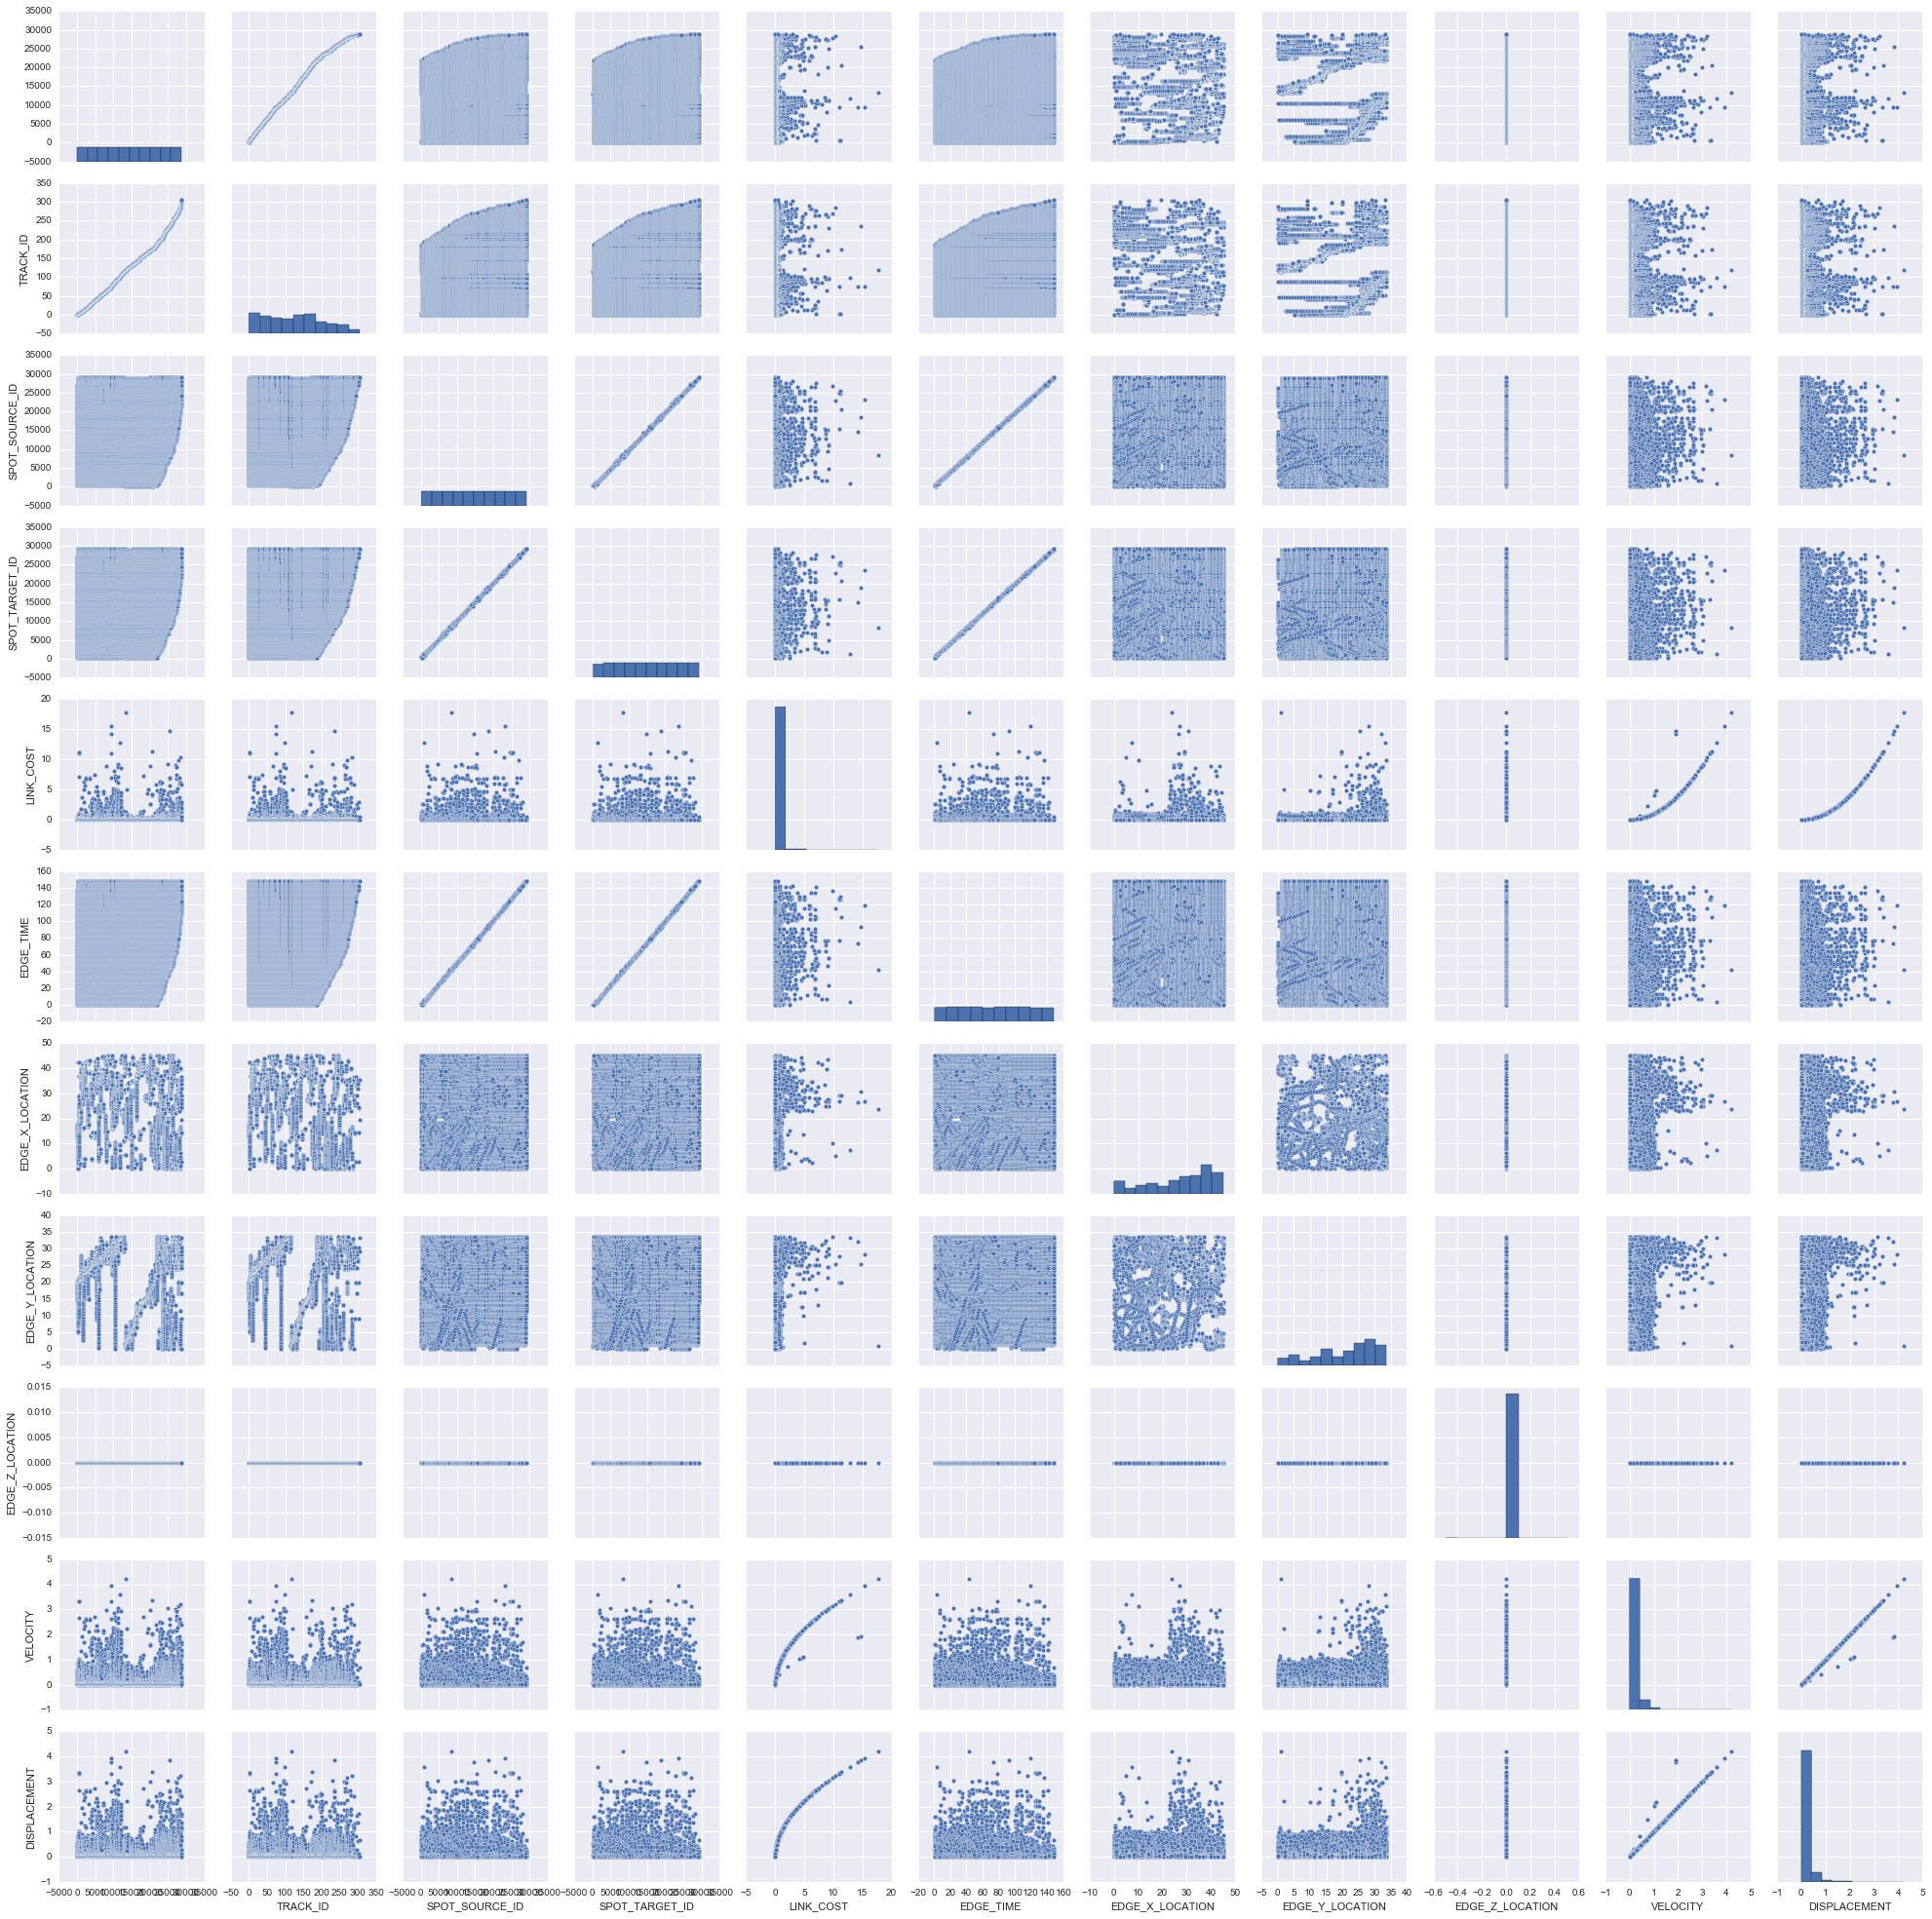

In [19]:
sns.pairplot(rd);

In [76]:
path = r'/Users/maxvilla/Desktop/grays_purps/Links in tracks statistics.txt'
rd2 = pd.read_table(path)

In [22]:
#rd2.column("TRACK_ID"=0) plot(x = EDGE_TIME y= DISPLACEMENT)
#rd2.column("TRACK_ID"=1) plot(x = EDGE_TIME y= DISPLACEMENT)

Label  TRACK_ID  SPOT_SOURCE_ID  SPOT_TARGET_ID  \
0          1      (ID447 : ID256)         0             447             256   
1          2      (ID256 : ID630)         0             256             630   
2          3      (ID630 : ID819)         0             630             819   
3          4     (ID819 : ID1200)         0             819            1200   
4          5    (ID1200 : ID1008)         0            1200            1008   
5          6    (ID1008 : ID1390)         0            1008            1390   
6          7    (ID1390 : ID1580)         0            1390            1580   
7          8    (ID1580 : ID1773)         0            1580            1773   
8          9    (ID1773 : ID1966)         0            1773            1966   
9         10    (ID1966 : ID2155)         0            1966            2155   
10        11    (ID2155 : ID2344)         0            2155            2344   
11        12    (ID2344 : ID2534)         0            2344            2534   
12        13    (ID2534 : ID2725)         0            2534            2725   
13        14    (ID2725 : ID2915)         0            2725            2915   
14        15    (ID2915 : ID3108)         0            2915            3108   
15        16    (ID3108 : ID3301)         0            3108            3301   
16        17    (ID3301 : ID3498)         0            3301            3498   
17        18    (ID3498 : ID3694)         0            3498            3694   
18        19    (ID3694 : ID3888)         0            3694            3888   
19        20    (ID3888 : ID4086)         0            3888            4086   
20        21    (ID4086 : ID4283)         0            4086            4283   
21        22    (ID4283 : ID4478)         0            4283            4478   
22        23    (ID4478 : ID4669)         0            4478            4669   
23        24    (ID4669 : ID4864)         0            4669            4864   
24        25    (ID4864 : ID5060)         0            4864            5060   
25        26    (ID5060 : ID5252)         0            5060            5252   
26        27    (ID5252 : ID5447)         0            5252            5447   
27        28    (ID5447 : ID5643)         0            5447            5643   
28        29    (ID5643 : ID5839)         0            5643            5839   
29        30    (ID5839 : ID6230)         0            5839            6230   
...      ...                  ...       ...             ...             ...   
28708  28709  (ID26981 : ID27359)       299           26981           27359   
28709  28710  (ID27359 : ID27544)       299           27359           27544   
28710  28711  (ID27544 : ID27724)       299           27544           27724   
28711  28712  (ID27724 : ID27909)       299           27724           27909   
28712  28713  (ID27909 : ID28094)       299           27909           28094   
28713  28714  (ID28094 : ID28279)       299           28094           28279   
28714  28715  (ID28279 : ID28464)       299           28279           28464   
28715  28716  (ID28464 : ID28648)       299           28464           28648   
28716  28717  (ID28648 : ID28831)       299           28648           28831   
28717  28718  (ID28831 : ID29016)       299           28831           29016   
28718  28719  (ID29016 : ID29202)       299           29016           29202   
28719  28720  (ID26812 : ID27194)       300           26812           27194   
28720  28721  (ID27194 : ID27003)       300           27194           27003   
28721  28722  (ID27003 : ID27566)       300           27003           27566   
28722  28723  (ID27566 : ID27756)       300           27566           27756   
28723  28724  (ID27756 : ID27942)       300           27756           27942   
28724  28725  (ID27942 : ID28127)       300           27942           28127   
28725  28726  (ID28127 : ID28310)       300           28127           28310   
28726  28727  (ID28310 : ID28494)       300           28310           28494   

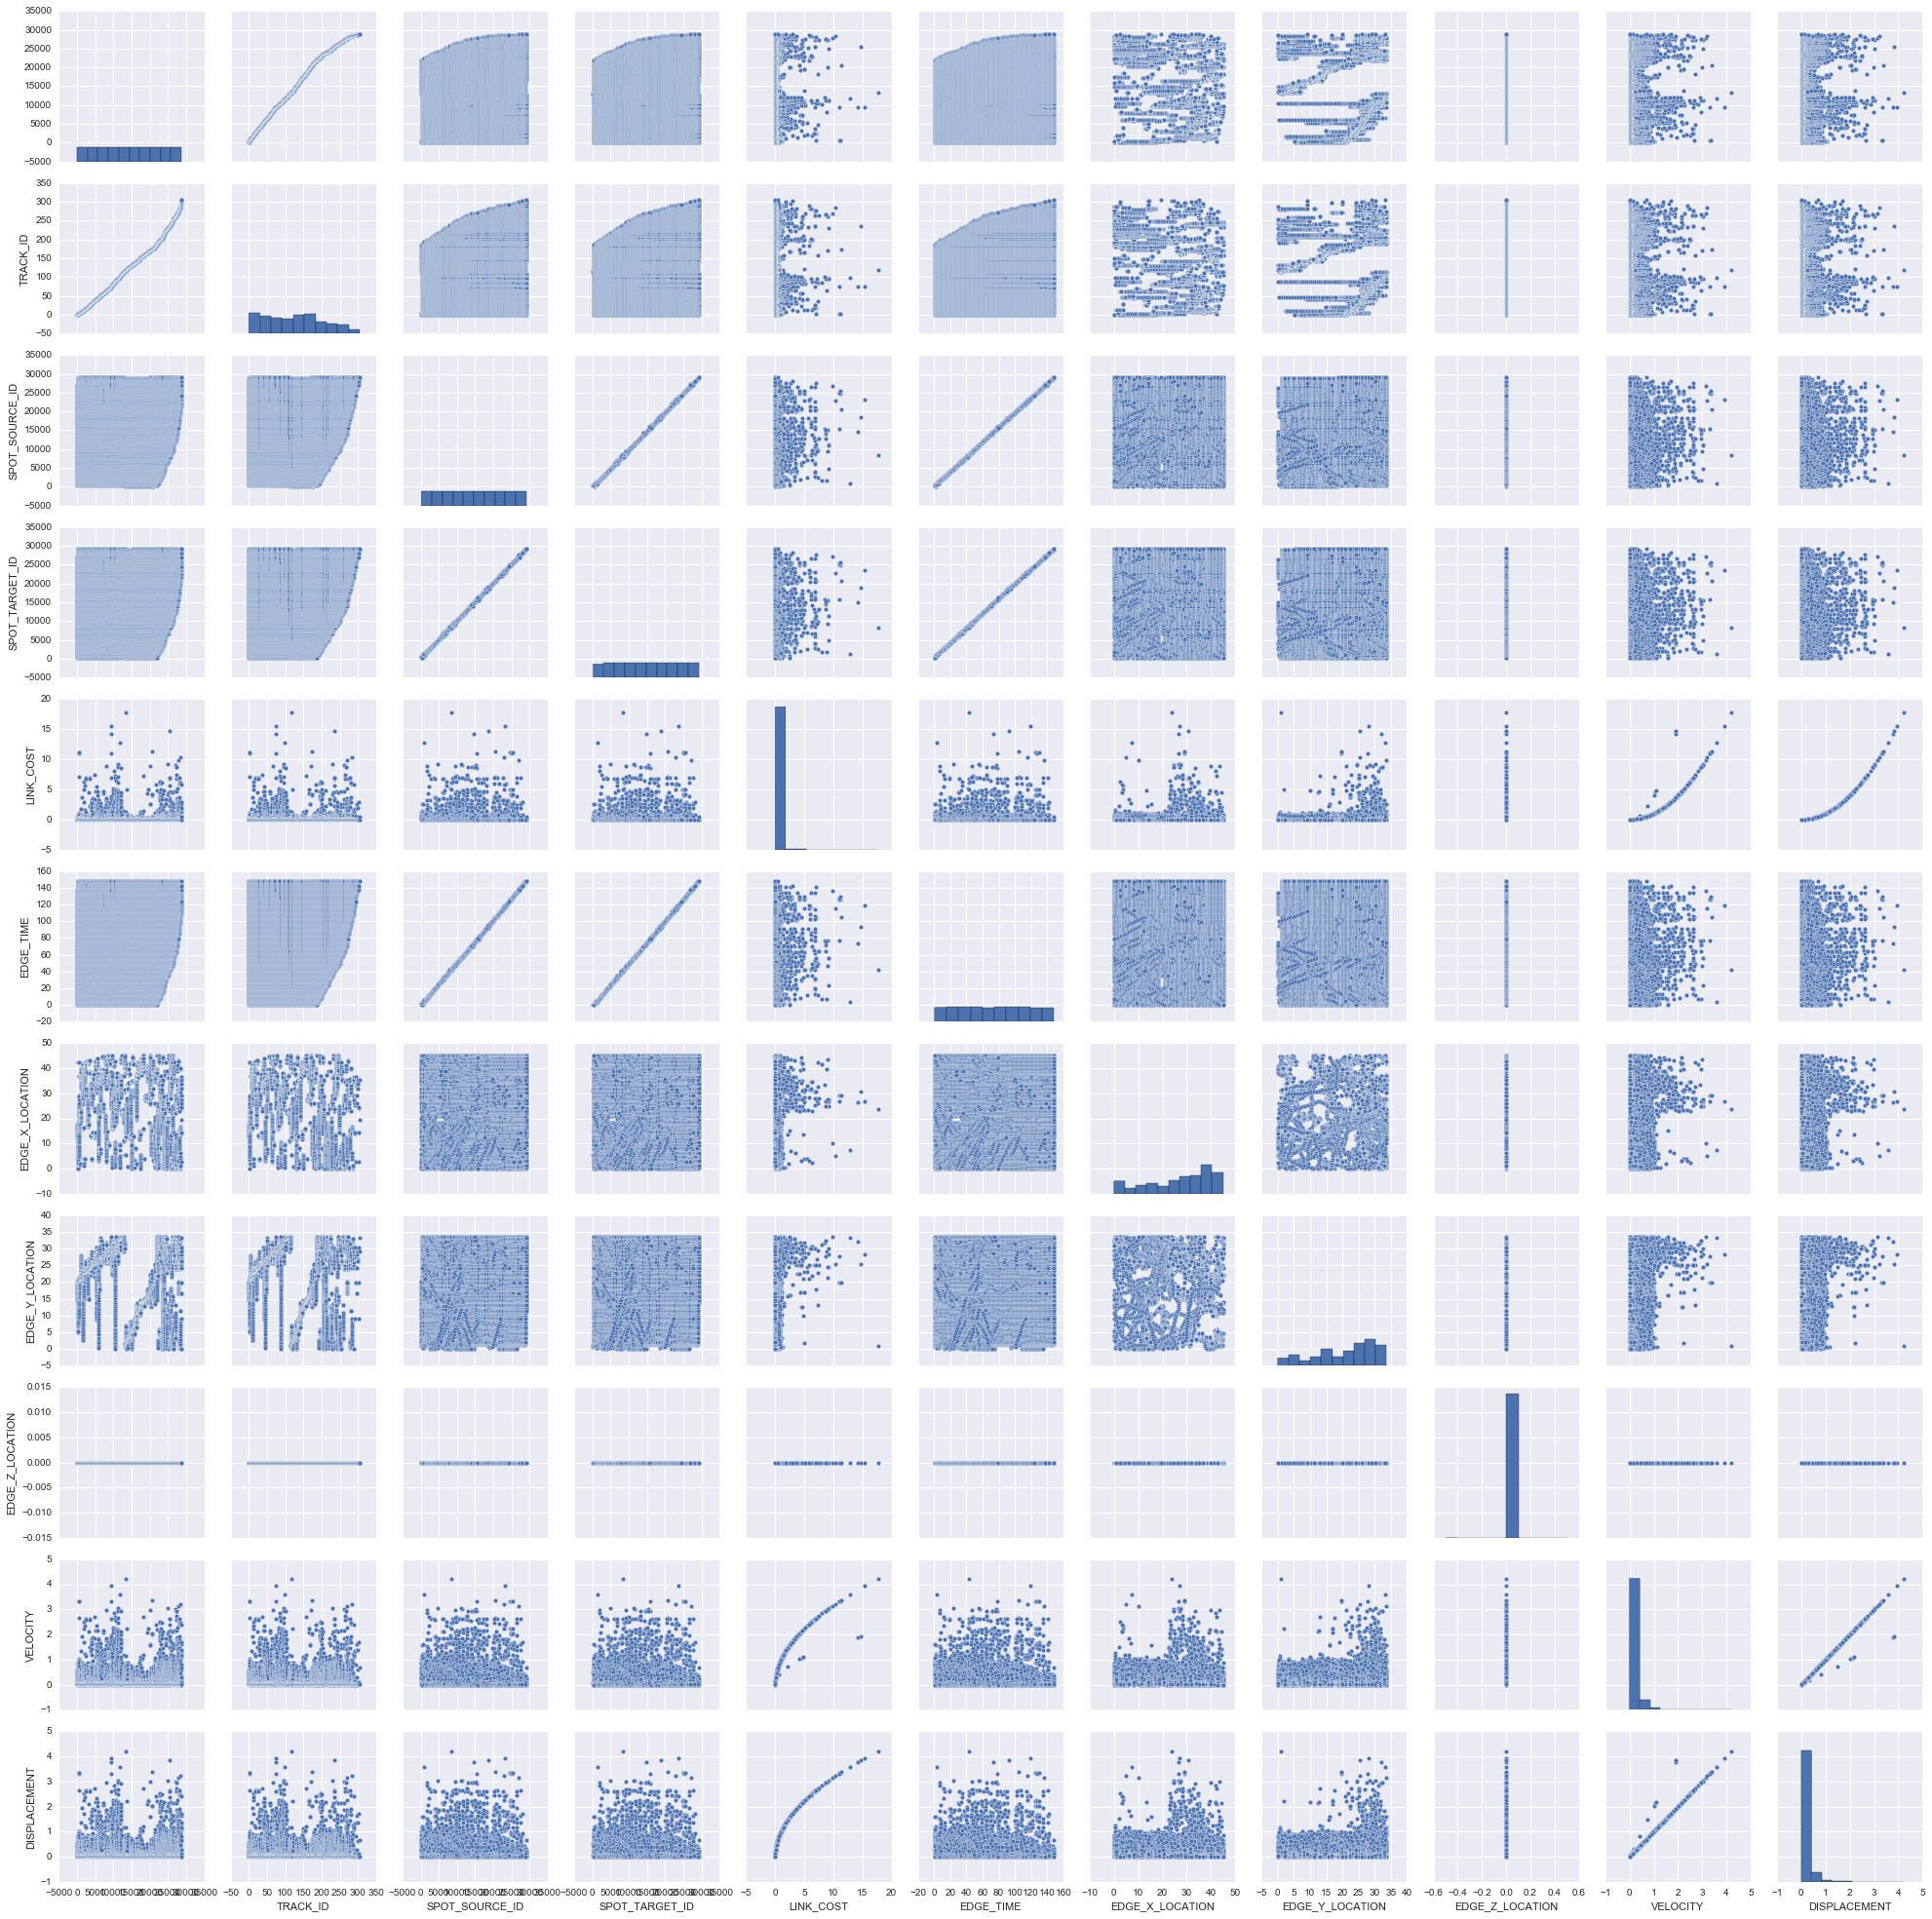

In [18]:
sns.pairplot(rd2);

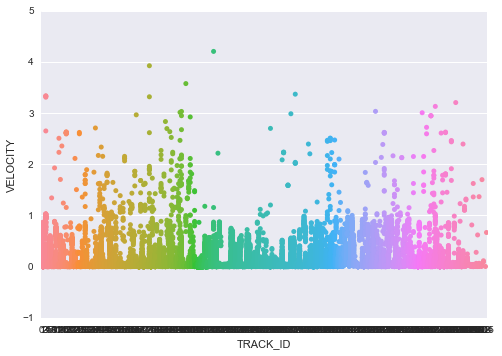

In [77]:
sns.stripplot(x="TRACK_ID", y="VELOCITY", data=rd2);


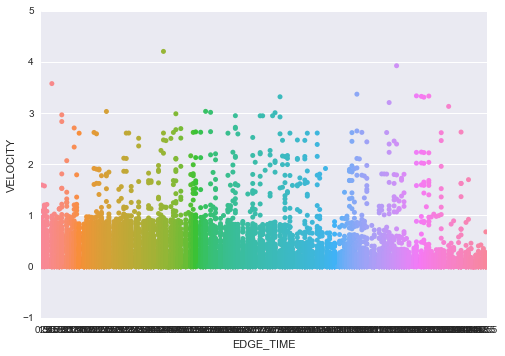

In [23]:
sns.stripplot(x="EDGE_TIME", y="VELOCITY", data=rd2);

In [78]:
rd3  = rd2.pivot(index='EDGE_TIME', columns='TRACK_ID', values='DISPLACEMENT')
rd3

TRACK_ID     0      1      2      3      4      5      6      7      8    \
EDGE_TIME                                                                  
0.5        0.204  0.832  0.025  0.961  0.026  0.042  0.352  0.271  0.026   
1.5        0.152  0.868  0.029  1.030  0.014  0.075  0.136  0.210  0.022   
2.5        0.123  0.842  0.059  0.978  0.045  0.107  0.071  0.032  0.052   
3.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3.5        0.140  0.748  0.016  0.991  0.017  0.056  0.105  0.313  0.004   
4.5        0.080  0.703  0.015  1.029  0.022  0.041  0.079  0.120  0.011   
5.5        0.169  0.695  0.028  0.976  0.021  0.119  0.176  0.067  0.016   
6.5        0.174  0.777  0.007  0.859  0.002  0.101  0.232  0.116  0.006   
7.5        0.108  0.715  0.028  1.020  0.019  0.062  0.308  0.201  0.022   
8.0          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8.5        0.086  0.598  0.005  1.009  0.006  0.043  0.330  0.044  0.013   
9.5        0.134  0.573  0.023  0.980  0.010  0.015  0.351  0.042  0.011   
10.5       0.053  0.314  0.006  0.960  0.011  0.040  0.382  0.103  0.006   
11.5       0.070  0.143  0.007  0.997  0.012  0.017  0.409  0.095  0.010   
12.5       0.137  0.165  0.015  0.714  0.021  0.048  0.464  0.067  0.005   
13.5       0.055  0.326  0.010  0.580  0.022  0.057  0.542  0.267  0.018   
14.0         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
14.5       0.240  0.519  0.005  0.296  0.003  0.067  0.487  0.378  0.024   
15.5       0.163  0.597  0.019  0.975  0.023  0.015  0.500  0.372  0.022   
16.5       0.106  0.732  0.011  0.975  0.011  0.030  0.483  0.386  0.013   
17.5       0.078  0.693  0.011  0.935  0.008  0.013  0.540  0.384  0.008   
18.5       0.103  0.788  0.010  0.800  0.009  0.045  0.510  0.423  0.012   
19.5       0.224  0.762  0.002  0.976  0.003  0.011  0.532  0.293  0.004   
20.5       0.317  0.816  0.010  1.020  0.004  0.035  0.470  0.266  0.005   
21.5       0.222  0.758  0.014  1.028  0.007  0.036  0.579  0.369  0.037   
22.5       0.373  0.759  0.002  0.711  0.005  0.017  0.564  0.303  0.030   
23.5       0.298  0.715  0.010  0.880  0.013  0.014  0.553  0.185  0.021   
24.5       0.345  0.637  0.029  1.030  0.027  0.048  0.505  0.268  0.060   
25.0         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25.5       0.353  0.760  0.018  0.782  0.019  0.094  0.383  0.056  0.014   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
124.5      0.039  0.000  0.004  0.011  0.016  0.019  0.068  0.006  0.008   
125.5      0.021  0.045  0.016  3.339  0.025  0.004  0.059  0.017  0.015   
126.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
126.5      0.078  0.000  0.007  3.329  0.013  0.013  0.068  0.010  0.010   
127.5      0.110  0.045  0.003  3.313  0.009  0.017  0.076  0.010  0.008   
128.5      0.080  0.045  0.026  0.018  0.019  0.003  0.141  0.018  0.018   
129.5      0.199  0.091  0.007  3.335  0.014  0.029  0.194  0.011  0.011   
130.5      0.171  0.045  0.011  0.009  0.009  0.007  0.100  0.005  0.001   
131.5      0.188  0.000  0.009  0.007  0.008  0.005  0.113  0.007  0.014   
132.5      0.050  0.000  0.012  0.013  0.015  0.019  0.247  0.004  0.011   
133.5      0.139  0.000  0.017  0.006  0.014  0.007  0.242  0.009  0.005   
134.5      0.093  0.000  0.009  0.002  0.003  0.009  0.220  0.002  0.003   
135.5      0.031  0.000  0.010  0.004  0.003  0.014  0.232  0.014  0.008   
136.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
136.5      0.041  0.045  0.021  0.013  0.009  0.007  0.257  0.026  0.014   
137.5      0.013  0.000  0.022  0.011  0.006  0.021  0.189  0.021  0.014   
138.5      0.059  0.000  0.006  0.006  0.003  0.005  0.176  0.012  0.007   
139.0        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
139.5      0.020  0.000  0.009  0.002  0.002  0.009  0.096  0.005  0.002   
140.5      0.043  0.000  0.007  0.003  0.007  0.

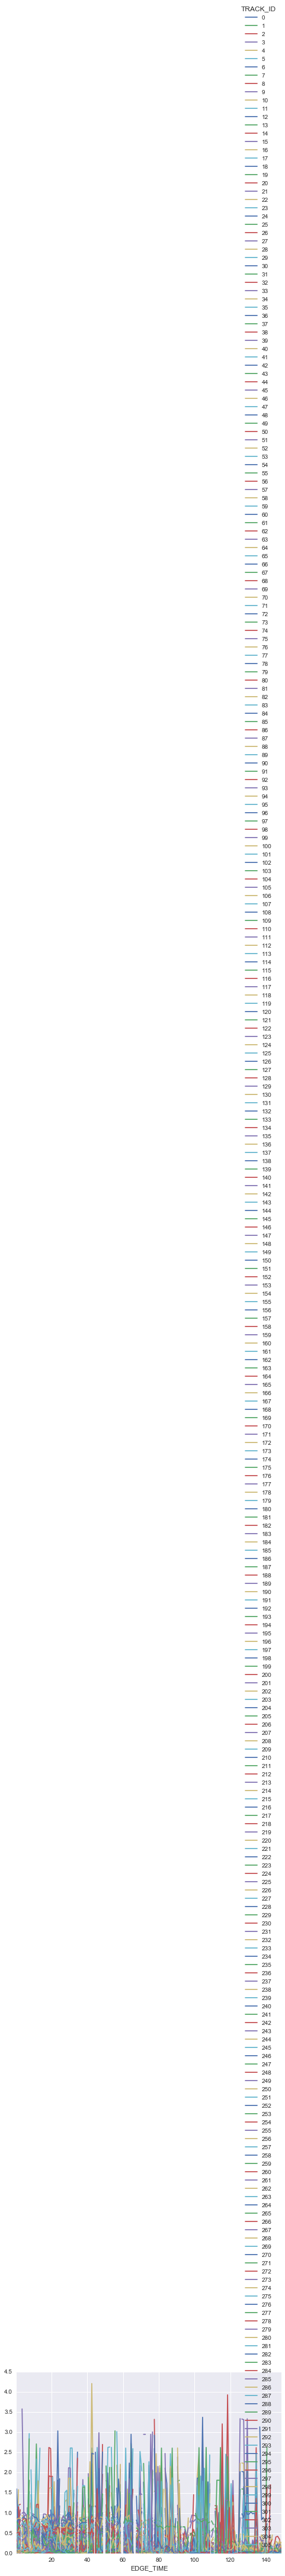

In [70]:
rd3.plot()

Seems I'm plotting Velocity versus time, but why is it so noisey? Is it the NaN? Why so many NaNs in data, where do they come from in original data?

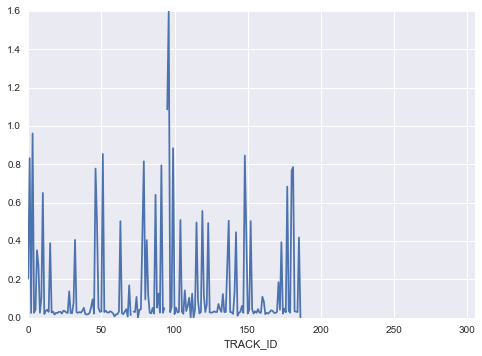

In [74]:
rd3.iloc[0].plot()

In [80]:
pd.isnull(rd2)

Label TRACK_ID SPOT_SOURCE_ID SPOT_TARGET_ID LINK_COST  \
0      False  False    False          False          False     False   
1      False  False    False          False          False     False   
2      False  False    False          False          False     False   
3      False  False    False          False          False     False   
4      False  False    False          False          False     False   
5      False  False    False          False          False     False   
6      False  False    False          False          False     False   
7      False  False    False          False          False     False   
8      False  False    False          False          False     False   
9      False  False    False          False          False     False   
10     False  False    False          False          False     False   
11     False  False    False          False          False     False   
12     False  False    False          False          False     False   
13     False  False    False          False          False     False   
14     False  False    False          False          False     False   
15     False  False    False          False          False     False   
16     False  False    False          False          False     False   
17     False  False    False          False          False     False   
18     False  False    False          False          False     False   
19     False  False    False          False          False     False   
20     False  False    False          False          False     False   
21     False  False    False          False          False     False   
22     False  False    False          False          False     False   
23     False  False    False          False          False     False   
24     False  False    False          False          False     False   
25     False  False    False          False          False     False   
26     False  False    False          False          False     False   
27     False  False    False          False          False     False   
28     False  False    False          False          False     False   
29     False  False    False          False          False     False   
...      ...    ...      ...            ...            ...       ...   
28708  False  False    False          False          False     False   
28709  False  False    False          False          False     False   
28710  False  False    False          False          False     False   
28711  False  False    False          False          False     False   
28712  False  False    False          False          False     False   
28713  False  False    False          False          False     False   
28714  False  False    False          False          False     False   
28715  False  False    False          False          False     False   
28716  False  False    False          False          False     False   
28717  False  False    False          False          False     False   
28718  False  False    False          False          False     False   
28719  False  False    False          False          False     False   
28720  False  False    False          False          False     False   
28721  False  False    False          False          False     False   
28722  False  False    False          False          False     False   
28723  False  False    False          False          False     False   
28724  False  False    False          False          False     False   
28725  False  False    False          False          False     False   
28726  False  False    False          False          False     False   
28727  False  False    False          False          False     False   
28728  False  False    False          False          False     False   
28729  False  False    False          False          False     False   
28730  False  False    False          False          False     False   
28731  False  False    False          False          F

In [81]:
rd3.fillna(0)

TRACK_ID     0      1      2      3      4      5      6      7      8    \
EDGE_TIME                                                                  
0.5        0.204  0.832  0.025  0.961  0.026  0.042  0.352  0.271  0.026   
1.5        0.152  0.868  0.029  1.030  0.014  0.075  0.136  0.210  0.022   
2.5        0.123  0.842  0.059  0.978  0.045  0.107  0.071  0.032  0.052   
3.0        0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
3.5        0.140  0.748  0.016  0.991  0.017  0.056  0.105  0.313  0.004   
4.5        0.080  0.703  0.015  1.029  0.022  0.041  0.079  0.120  0.011   
5.5        0.169  0.695  0.028  0.976  0.021  0.119  0.176  0.067  0.016   
6.5        0.174  0.777  0.007  0.859  0.002  0.101  0.232  0.116  0.006   
7.5        0.108  0.715  0.028  1.020  0.019  0.062  0.308  0.201  0.022   
8.0        0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
8.5        0.086  0.598  0.005  1.009  0.006  0.043  0.330  0.044  0.013   
9.5        0.134  0.573  0.023  0.980  0.010  0.015  0.351  0.042  0.011   
10.5       0.053  0.314  0.006  0.960  0.011  0.040  0.382  0.103  0.006   
11.5       0.070  0.143  0.007  0.997  0.012  0.017  0.409  0.095  0.010   
12.5       0.137  0.165  0.015  0.714  0.021  0.048  0.464  0.067  0.005   
13.5       0.055  0.326  0.010  0.580  0.022  0.057  0.542  0.267  0.018   
14.0       0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
14.5       0.240  0.519  0.005  0.296  0.003  0.067  0.487  0.378  0.024   
15.5       0.163  0.597  0.019  0.975  0.023  0.015  0.500  0.372  0.022   
16.5       0.106  0.732  0.011  0.975  0.011  0.030  0.483  0.386  0.013   
17.5       0.078  0.693  0.011  0.935  0.008  0.013  0.540  0.384  0.008   
18.5       0.103  0.788  0.010  0.800  0.009  0.045  0.510  0.423  0.012   
19.5       0.224  0.762  0.002  0.976  0.003  0.011  0.532  0.293  0.004   
20.5       0.317  0.816  0.010  1.020  0.004  0.035  0.470  0.266  0.005   
21.5       0.222  0.758  0.014  1.028  0.007  0.036  0.579  0.369  0.037   
22.5       0.373  0.759  0.002  0.711  0.005  0.017  0.564  0.303  0.030   
23.5       0.298  0.715  0.010  0.880  0.013  0.014  0.553  0.185  0.021   
24.5       0.345  0.637  0.029  1.030  0.027  0.048  0.505  0.268  0.060   
25.0       0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
25.5       0.353  0.760  0.018  0.782  0.019  0.094  0.383  0.056  0.014   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
124.5      0.039  0.000  0.004  0.011  0.016  0.019  0.068  0.006  0.008   
125.5      0.021  0.045  0.016  3.339  0.025  0.004  0.059  0.017  0.015   
126.0      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
126.5      0.078  0.000  0.007  3.329  0.013  0.013  0.068  0.010  0.010   
127.5      0.110  0.045  0.003  3.313  0.009  0.017  0.076  0.010  0.008   
128.5      0.080  0.045  0.026  0.018  0.019  0.003  0.141  0.018  0.018   
129.5      0.199  0.091  0.007  3.335  0.014  0.029  0.194  0.011  0.011   
130.5      0.171  0.045  0.011  0.009  0.009  0.007  0.100  0.005  0.001   
131.5      0.188  0.000  0.009  0.007  0.008  0.005  0.113  0.007  0.014   
132.5      0.050  0.000  0.012  0.013  0.015  0.019  0.247  0.004  0.011   
133.5      0.139  0.000  0.017  0.006  0.014  0.007  0.242  0.009  0.005   
134.5      0.093  0.000  0.009  0.002  0.003  0.009  0.220  0.002  0.003   
135.5      0.031  0.000  0.010  0.004  0.003  0.014  0.232  0.014  0.008   
136.0      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
136.5      0.041  0.045  0.021  0.013  0.009  0.007  0.257  0.026  0.014   
137.5      0.013  0.000  0.022  0.011  0.006  0.021  0.189  0.021  0.014   
138.5      0.059  0.000  0.006  0.006  0.003  0.005  0.176  0.012  0.007   
139.0      0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
139.5      0.020  0.000  0.009  0.002  0.002  0.009  0.096  0.005  0.002   
140.5      0.043  0.000  0.007  0.003  0.007  0.

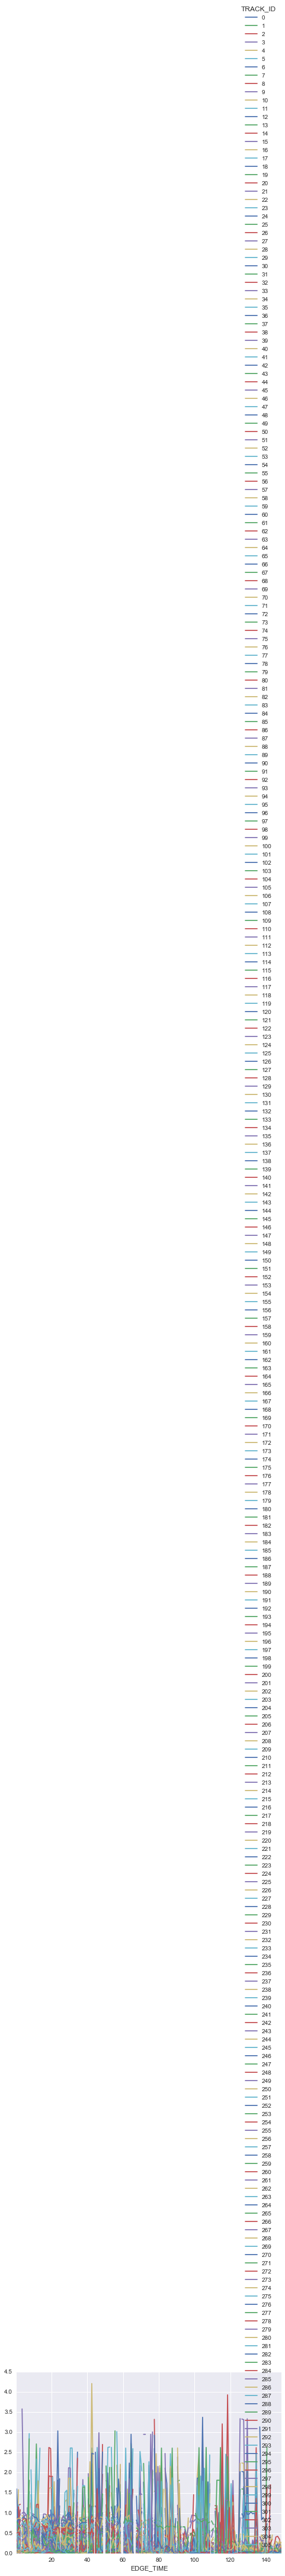

In [82]:
rd3.plot()

Okay, so outlier peaks are not Nan artifacts. Might be an artifact of tracking settings - might make radius of movement smaller? Double check those are real. 
In any event, I would like to calculate the average velocity as a function of time.

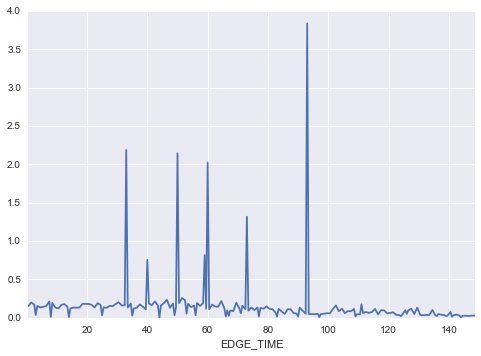

In [86]:
rd3.mean(1).plot()
#plt.gca().set_xlim([1,100000])

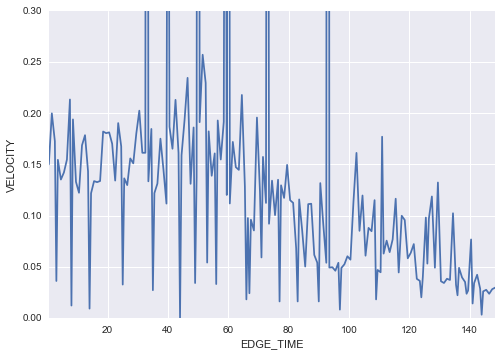

In [93]:
rd3.mean(1).plot()
plt.gca().set_ylim([0,0.3])
plt.gca().set_ylabel('VELOCITY')

Okay, not bad. Signal is pretty noisy. Where does the noise come from? Can I plot a polynomial fit? Is the scale correct? What are the units for velocity and edge time?

Edge time should be 10 ms intervals 
Velocity should be...

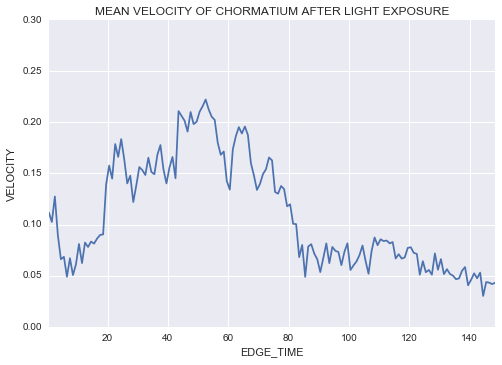

In [100]:
#tried filtering tracks to not include non-motile guys from the start
path = r'/Users/maxvilla/Desktop/grays_purps/Links in tracks statistics_2_filtered.txt'
rd4 = pd.read_table(path)

rd5  = rd4.pivot(index='EDGE_TIME', columns='TRACK_ID', values='DISPLACEMENT')
rd5.fillna(0)
rd5.mean(1).plot()
plt.gca().set_ylim([0,0.3])
plt.gca().set_ylabel('VELOCITY')
plt.gca().set_title('MEAN VELOCITY OF CHORMATIUM AFTER LIGHT EXPOSURE')


In [69]:
type(rd3.ix[3])

pandas.core.series.Series